In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
material= "/gate/geometry/setMaterialDatabase ../data/GateMaterials.db \n"

world=  """
/gate/world/geometry/setXLength 2. m 
/gate/world/geometry/setYLength 2. m 
/gate/world/geometry/setZLength 2. m 
/gate/world/setMaterial Air 
/gate/world/vis/setVisible 0 \n"""

detector="""
/gate/world/daughters/name CTscanner 
/gate/world/daughters/insert box 
/gate/CTscanner/setMaterial Tungsten 
/gate/CTscanner/geometry/setXLength 25 mm 
/gate/CTscanner/geometry/setYLength 25 mm 
/gate/CTscanner/geometry/setZLength 5 mm 
/gate/CTscanner/vis/forceSolid 
/gate/CTscanner/vis/setColor yellow 
/gate/CTscanner/placement/setTranslation 0. 0. 5. cm \n"""


phatom_pt1= """
/gate/world/daughters/name Fantoma 
/gate/world/daughters/insert box 
/gate/Fantoma/placement/setTranslation 0.0 0.0 0.0 cm 
/gate/Fantoma/geometry/setXLength 3 cm 
/gate/Fantoma/geometry/setYLength 3 cm 
/gate/Fantoma/geometry/setZLength 2 mm 
/gate/Fantoma/setMaterial PMMA 
/gate/Fantoma/vis/forceWireframe 
/gate/Fantoma/vis/setColor red \n
"""
#Aqui deben ser las rotaciones

Cristales="""
/gate/Fantoma/daughters/name crystalHAs 
/gate/Fantoma/daughters/insert sphere 
/gate/crystalHAs/placement/setTranslation -4.5 0. 0. mm 

/gate/crystalHAs/geometry/setRmin 0 mm 
/gate/crystalHAs/geometry/setRmax 1 mm 
/gate/crystalHAs/geometry/setPhiStart 0 deg 
/gate/crystalHAs/geometry/setDeltaPhi 360 deg 
/gate/crystalHAs/geometry/setThetaStart 0 deg 
/gate/crystalHAs/geometry/setDeltaTheta 360 deg 
/gate/crystalHAs/setMaterial HA 
#/gate/crystalHAs/vis/forceWireframe 
/gate/crystalHAs/vis/setColor yellow 

/gate/crystalHAs/repeaters/insert linear 
/gate/crystalHAs/linear/setRepeatNumber 5 
/gate/crystalHAs/linear/setRepeatVector 2. 0. 0. mm  
/gate/crystalHAs/linear/autoCenter true  \n """

physi="""
/gate/physics/addPhysicsList emstandard_opt4 \n
"""
Digi_pt1= """
/gate/actor/addActor DoseActor     MyActor \n
"""

Digi_pt2="""
/gate/actor/MyActor/attachTo                    CTscanner 
/gate/actor/MyActor/setResolution               256 256 1 
/gate/actor/MyActor/stepHitType                 post \n
"""

verbose="""
/control/verbose 0 
/run/verbose 0 
/run/particle/verbose 0 
/event/verbose 0 
/tracking/verbose 0 
/tracking/verbose 0 
/gate/generator/verbose 0 
/gate/source/verbose 0 
/run/particle/verbose 0 \n
"""
init= """/gate/run/initialize
/gate/random/setEngineName MersenneTwister
/gate/random/setEngineSeed auto
"""

source="""
/gate/source/addSource electron_beam gps
/gate/source/electron_beam/gps/particle gamma 
/gate/source/electron_beam/gps/ene/type Gauss 
/gate/source/electron_beam/gps/ene/mono 0.02 MeV 
/gate/source/electron_beam/gps/ene/sigma 0.00216 MeV 
/gate/source/electron_beam/gps/centre 0 0 -23 cm 
/gate/source/electron_beam/gps/angtype iso 
/gate/source/electron_beam/gps/mintheta 0 deg 
/gate/source/electron_beam/gps/maxtheta 0 deg 
/gate/source/electron_beam/gps/minphi 0 deg 
/gate/source/electron_beam/gps/maxphi 0 deg 
/gate/source/electron_beam/gps/type Plane 
/gate/source/electron_beam/gps/shape Square
/gate/source/electron_beam/gps/halfx 15 mm
/gate/source/electron_beam/gps/halfy 15 mm
"""

adquisition="""
/gate/application/setTotalNumberOfPrimaries 1e6 
/gate/application/start \n
"""

In [70]:
Num_proyec=50 #Numero de proyecciones que se usaran
Num_Angulos=Num_proyec+2
Angulos= np.linspace(-15,15,Num_Angulos) #lo normal es que sea entre -10 y 10 grados
Angulos= np.append(Angulos,0)
Num_Angulos=Num_Angulos +1
print(Angulos)

[-15.         -14.41176471 -13.82352941 -13.23529412 -12.64705882
 -12.05882353 -11.47058824 -10.88235294 -10.29411765  -9.70588235
  -9.11764706  -8.52941176  -7.94117647  -7.35294118  -6.76470588
  -6.17647059  -5.58823529  -5.          -4.41176471  -3.82352941
  -3.23529412  -2.64705882  -2.05882353  -1.47058824  -0.88235294
  -0.29411765   0.29411765   0.88235294   1.47058824   2.05882353
   2.64705882   3.23529412   3.82352941   4.41176471   5.
   5.58823529   6.17647059   6.76470588   7.35294118   7.94117647
   8.52941176   9.11764706   9.70588235  10.29411765  10.88235294
  11.47058824  12.05882353  12.64705882  13.23529412  13.82352941
  14.41176471  15.           0.        ]


In [27]:
for i in range(2):
    f = open('Base.mac', "w")            
    f.write(material) #directorio de materiales
    f.write(world) #Se crea el world
    f.write(detector) #Se crea el detector
    f.write(phatom_pt1) #Se crea el phantoma

    #Aqui van las rotaciones
    #Final de las rotaciones


    #f.write(Cristales) #Se insertan los cristales
    f.write(physi) #Cargamos las fisicas
    f.write(Digi_pt1) #Parte 1 del actor

    #Nombres diferentes para las salidas
    f.write("/gate/actor/MyActor/save                        MyOutputFileBase.mhd \n" ) 
    #Final de los nombres

    f.write(Digi_pt2) #parte 2 del actor
    f.write(verbose) #cargamos verbose
    f.write(init) #inicializamos
    f.write(source) #agregar fuente
    f.write(adquisition) #empezar simulación

In [28]:
names=[]
exce=[]
exce.append('#!/bin/bash')

for i in range(Num_Angulos):
    f = open('main%d.mac' %i, "w")
    names.append('main%d.mac' %i)
    exce.append('Gate'+' '+'main%d.mac' %i)             
    f.write(material) #directorio de materiales
    f.write(world) #Se crea el world
    f.write(detector) #Se crea el detector
    f.write(phatom_pt1) #Se crea el phantoma
    
    #Aqui van las rotaciones
    f.write("/gate/Fantoma/placement/setRotationAxis 0 1 0 \n" )
    f.write("/gate/Fantoma/placement/setRotationAngle %f deg \n " %Angulos[i] )
    #Final de las rotaciones
    
    f.write(Cristales) #Se insertan los cristales
    f.write(physi) #Cargamos las fisicas
    f.write(Digi_pt1) #Parte 1 del actor
    
    #Nombres diferentes para las salidas
    f.write("/gate/actor/MyActor/save                        MyOutputFile%d.mhd \n" %i ) 
    #FInal de los nombres
    
    f.write(Digi_pt2) #parte 2 del actor
    f.write(verbose) #cargamos verbose
    f.write(init) #inicializamos
    f.write(source) #agregar fuente
    f.write(adquisition) #empezar simulación

In [8]:
print(names[-1])

main51.mac


In [ ]:
!rm main101.mac

In [29]:
fg = open('gates.sh' , "w")
for i in exce:
    fg.write(i)
    fg.write("\n")

In [30]:
#Es necesario correr dos veces
fg = open('gates.sh' , "w")
for i in exce:
    fg.write(i)
    fg.write("\n")

In [31]:
!chmod u+x gates.sh

In [32]:
!bash gates.sh

[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 881-901
[Core-0]  Reference : Med. Phys. 41(6)    (2014)
[Core-0]  http://www.opengatecollabor


msc:  for alpha  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            UrbanMsc : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

ionIoni:  for alpha  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.02
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            BraggIon : Emin=    0 eV  Emax=7.9452 MeV  deltaVI
          BetheBloch : Emin=7.9452 MeV Emax=  100 TeV  deltaVI

nuclearStopping:  for alpha applyCuts:1  SubType=8 BuildTable=0
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   ICRU49NucStopping : Emin=    0 eV  Emax=    1 MeV

msc:  for anti_proton  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRe


hIoni:  for pi+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for pi+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 20x1001; from 1.11656 G


eIoni:  for e-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.01 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       LowEnergyIoni : Emin=    0 eV  Emax=  100 keV  deltaVI
        MollerBhabha : Emin=  100 keV Emax=  100 TeV  deltaVI

eBrem:  for e-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      LPM flag: 1 for E > 1 GeV,  VertexHighEnergyTh(GeV)= 100000
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
             eBremSB : Emin=    0 eV  Emax=    1 GeV  AngularGen2BS
            eBremLPM : Emin=    1 GeV Emax=  100 TeV  AngularGen2BS

ePairProd:  for e-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from thresho


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main1.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 88

      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50618 GeV to 100 TeV 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
           hPairProd : Emin=    0 eV  Emax=  100 TeV

CoulombScat:  for anti_proton, integral:1  applyCuts:1  SubType=1 BuildTable=1
      Lambda table from threshold  to 100 TeV, 20 bins/decade, spline: 1
      ThetaMin(p) < Theta(degree) < 180; pLimit(GeV^1)= 0.139531
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
  eCoulombScattering : Emin=    0 eV  Emax=  100 TeV

msc:  for kaon+  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      

[Core-0] End of macro main2.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 88


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp

GateToTree::SetOutputIDName, id_system = '0' anOutputIDName = 'gantryID' depth = '0'
GateToTree::SetOutputIDName, id_system = '0' anOutputIDName = 'moduleID' depth = '1'
GateToTree::SetOutputIDName, id_system = '0' anOutputIDName = 'clusterID' depth = '2'
GateToTree::SetOutputIDName, id_system = '0' anOutputIDName = 'pixelID' depth = '3'
 Rmin/gate/crystalHAs/geometry/setRmin
[Physic-0] The following Geant4's physic-list is enabled :emstandard_opt4
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
 <!> *** WARNING *** <!>  The 'centre' option is DEPRECATED, use 'pos/centre' instead!
 <!> *** WARNING *** <!>  The 'angtype' option is DEPRECATED, use 'ang/type' instead!
 <!> *** WARNING *** <!>  The 'mintheta' option is DEPRECATED, use 'ang/mintheta' instead!
 <!> *** WARNING *** <!>  The 'maxtheta' option is DEPRECATED, use 'ang/maxtheta' instead!
 <!> *** WARNING *** <!>  The 'minphi' option is DEPRECATED, use 'ang/minphi' instead!



ionIoni:  for GenericIon  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.001 mm), integ: 1, fluct: 1, linLossLim= 0.02
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
         ParamICRU73 : Emin=    0 eV  Emax=  100 TeV  deltaVI

nuclearStopping:  for GenericIon applyCuts:1  SubType=8 BuildTable=0
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   ICRU49NucStopping : Emin=    0 eV  Emax=    1 MeV

msc:  for alpha  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            UrbanMsc : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

ionIoni:  for alpha  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=


muIoni:  for mu-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main5.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 88


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main6.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 88

   ICRU49NucStopping : Emin=    0 eV  Emax=    1 MeV

msc:  for anti_proton  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

hIoni:  for anti_proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for anti_proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBr

CoulombScat:  for mu-, integral:1  applyCuts:1  SubType=1 BuildTable=1
      Used Lambda table of mu+
      ThetaMin(p) < Theta(degree) < 180; pLimit(GeV^1)= 0.139531
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
  eCoulombScattering : Emin=    0 eV  Emax=  100 TeV

msc:  for pi+  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

hIoni:  for pi+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi+  SubType=3
      dE/


eIoni:  for e+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.01 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
             PenIoni : Emin=    0 eV  Emax=  100 keV
        MollerBhabha : Emin=  100 keV Emax=  100 TeV  deltaVI

eBrem:  for e+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      LPM flag: 1 for E > 1 GeV,  VertexHighEnergyTh(GeV)= 100000
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
             eBremSB : Emin=    0 eV  Emax=    1 GeV  AngularGen2BS
            eBremLPM : Emin=    1 GeV Emax=  100 TeV  AngularGen2BS

ePairProd:  for e+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100

      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 21x1001; from 1 GeV to 100 TeV 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
          muPairProd : Emin=    0 eV  Emax=  100 TeV

CoulombScat:  for mu+, integral:1  applyCuts:1  SubType=1 BuildTable=1
      Lambda table from threshold  to 100 TeV, 20 bins/decade, spline: 1
      ThetaMin(p) < Theta(degree) < 180; pLimit(GeV^1)= 0.139531
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
  eCoulombScattering : Emin=    0 eV  Emax=  100 TeV

msc:  for mu-  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1, polarAngLim(deg)= 180
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

muIoni:  for mu-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins



### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9


hIoni:  for pi-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for pi-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 20x1001; from 1.11656 G


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main11.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main13.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main15.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main17.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main19.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for anti_proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for anti_proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for anti_proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x

### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore
[Core-0] End of macro main20.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-


msc:  for alpha  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            UrbanMsc : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

ionIoni:  for alpha  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.02
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            BraggIon : Emin=    0 eV  Emax=7.9452 MeV  deltaVI
          BetheBloch : Emin=7.9452 MeV Emax=  100 TeV  deltaVI

nuclearStopping:  for alpha applyCuts:1  SubType=8 BuildTable=0
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   ICRU49NucStopping : Emin=    0 eV  Emax=    1 MeV

msc:  for anti_proton  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRe

      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 21x1001; from 1 GeV to 100 TeV 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
          muPairProd : Emin=    0 eV  Emax=  100 TeV

CoulombScat:  for mu-, integral:1  applyCuts:1  SubType=1 BuildTable=1
      Used Lambda table of mu+
      ThetaMin(p) < Theta(degree) < 180; pLimit(GeV^1)= 0.139531
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
  eCoulombScattering : Emin=    0 eV  Emax=  100 TeV

msc:  for pi+  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

hIoni:  for pi+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spl


phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
      BetheHeitler5D : Emin=    0 eV  Emax=  100 TeV  ModifiedTsai

Rayl:  for gamma applyCuts:1  SubType=11 BuildTable=1
      Lambda table from 100 eV  to 100 keV, 20 


CoulombScat:  for anti_proton, integral:1  applyCuts:1  SubType=1 BuildTable=1
      Lambda table from threshold  to 100 TeV, 20 bins/decade, spline: 1
      ThetaMin(p) < Theta(degree) < 180; pLimit(GeV^1)= 0.139531
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
  eCoulombScattering : Emin=    0 eV  Emax=  100 TeV

msc:  for kaon+  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  

[Core-0] End of macro main22.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for anti_proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for anti_proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for anti_proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x


hIoni:  for pi+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for pi+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 20x1001; from 1.11656 G


eIoni:  for e-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.01 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       LowEnergyIoni : Emin=    0 eV  Emax=  100 keV  deltaVI
        MollerBhabha : Emin=  100 keV Emax=  100 TeV  deltaVI

eBrem:  for e-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      LPM flag: 1 for E > 1 GeV,  VertexHighEnergyTh(GeV)= 100000
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
             eBremSB : Emin=    0 eV  Emax=    1 GeV  AngularGen2BS
            eBremLPM : Emin=    1 GeV Emax=  100 TeV  AngularGen2BS

ePairProd:  for e-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from thresho


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main25.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main27.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8

      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50618 GeV to 100 TeV 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
           hPairProd : Emin=    0 eV  Emax=  100 TeV

CoulombScat:  for proton, integral:1  applyCuts:1  SubType=1 BuildTable=1
      Lambda table from threshold  to 100 TeV, 20 bins/decade, spline: 1
      ThetaMin(p) < Theta(degree) < 180; pLimit(GeV^1)= 0.139531
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
  eCoulombScattering : Emin=    0 eV  Emax=  100 TeV

msc:  for GenericIon  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 0
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            UrbanMsc : Emin=    0 eV  Emax=  100 TeV

ionIoni:  for GenericIon  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from th


msc:  for pi+  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

hIoni:  for pi+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold 


eIoni:  for e-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.01 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       LowEnergyIoni : Emin=    0 eV  Emax=  100 keV  deltaVI
        MollerBhabha : Emin=  100 keV Emax=  100 TeV  deltaVI

eBrem:  for e-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      LPM flag: 1 for E > 1 GeV,  VertexHighEnergyTh(GeV)= 100000
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
             eBremSB : Emin=    0 eV  Emax=    1 GeV  AngularGen2BS
            eBremLPM : Emin=    1 GeV Emax=  100 TeV  AngularGen2BS

ePairProd:  for e-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from thresho


hPairProd:  for kaon-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.94942 GeV to 100 TeV 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
           hPairProd : Emin=    0 eV  Emax=  100 TeV

CoulombScat:  for kaon-, integral:1  applyCuts:1  SubType=1 BuildTable=1
      Used Lambda table of kaon+
      ThetaMin(p) < Theta(degree) < 180; pLimit(GeV^1)= 0.139531
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
  eCoulombScattering : Emin=    0 eV  Emax=  100 TeV

msc:  for mu+  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1, polarAngLim(deg)= 180
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bin

[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 881-901
[Core-0]  Reference : Med. Phys. 41(6)    (2014)
[Core-0]  http://www.opengatecollabor


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main31.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main33.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for anti_proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for anti_proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for anti_proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x


hIoni:  for pi+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for pi+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 20x1001; from 1.11656 G


eIoni:  for e-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.01 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       LowEnergyIoni : Emin=    0 eV  Emax=  100 keV  deltaVI
        MollerBhabha : Emin=  100 keV Emax=  100 TeV  deltaVI

eBrem:  for e-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      LPM flag: 1 for E > 1 GeV,  VertexHighEnergyTh(GeV)= 100000
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
             eBremSB : Emin=    0 eV  Emax=    1 GeV  AngularGen2BS
            eBremLPM : Emin=    1 GeV Emax=  100 TeV  AngularGen2BS

ePairProd:  for e-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from thresho


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main35.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main37.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main38.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main40.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main41.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main44.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon-  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon-  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon-  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main46.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main48.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp


### === G4UAtomicDeexcitation::InitialiseForNewRun()
### ===  Auger cascade flag: 1
### ===  Ignore cuts flag:   0
### ===  PIXE model for hadrons: Empirical
### ===  PIXE model for e+-:     Livermore

phot:  for gamma applyCuts:1  SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 174 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma applyCuts:1  SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 20 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 160 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   LowEPComptonModel : Emin=    0 eV  Emax=   20 MeV Fluo
        KleinNishina : Emin=   20 MeV Emax=  100 TeV Fluo

conv:  for gamma applyCuts:1  SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region 


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro main50.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 8


ionIoni:  for GenericIon  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.001 mm), integ: 1, fluct: 1, linLossLim= 0.02
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
         ParamICRU73 : Emin=    0 eV  Emax=  100 TeV  deltaVI

nuclearStopping:  for GenericIon applyCuts:1  SubType=8 BuildTable=0
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
   ICRU49NucStopping : Emin=    0 eV  Emax=    1 MeV

msc:  for alpha  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            UrbanMsc : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

ionIoni:  for alpha  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=


hIoni:  for pi+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for pi+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 20x1001; from 1.11656 G

In [33]:
del names
del exce
del f
del fg
del world,detector,phatom_pt1,Cristales,physi,Digi_pt1,Digi_pt2,verbose,init,source,adquisition

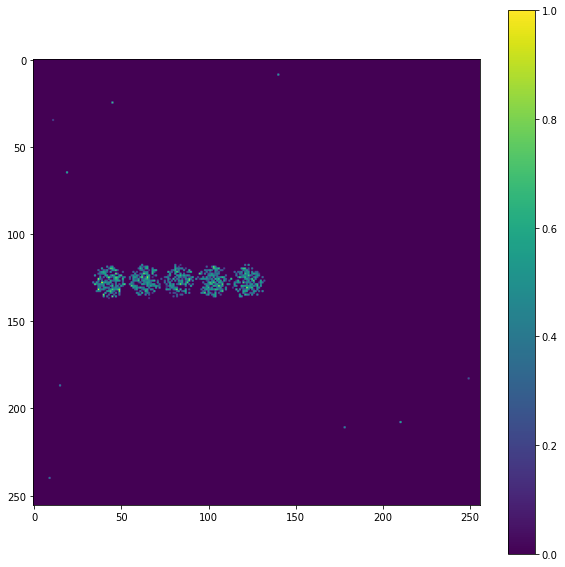

In [35]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile0-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis = ct_scans[0]+0.00000000001
ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase-Dose.mhd' , sitk.sitkFloat32))
imagen_GATE_dosisBase = ct_scansBase[0]

imagen_GATE_dosis= imagen_GATE_dosisBase/imagen_GATE_dosis
imagen_GATE_dosis= imagen_GATE_dosis/np.max(imagen_GATE_dosis)
#imagen_GATE_dosis= imagen_GATE_dosisBase
#imagen_GATE_dosis= imagen_GATE_dosis<1

fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosis,cmap='viridis')
plt.colorbar()

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "MyOutputFile52-Dose.mhd" does not exist.

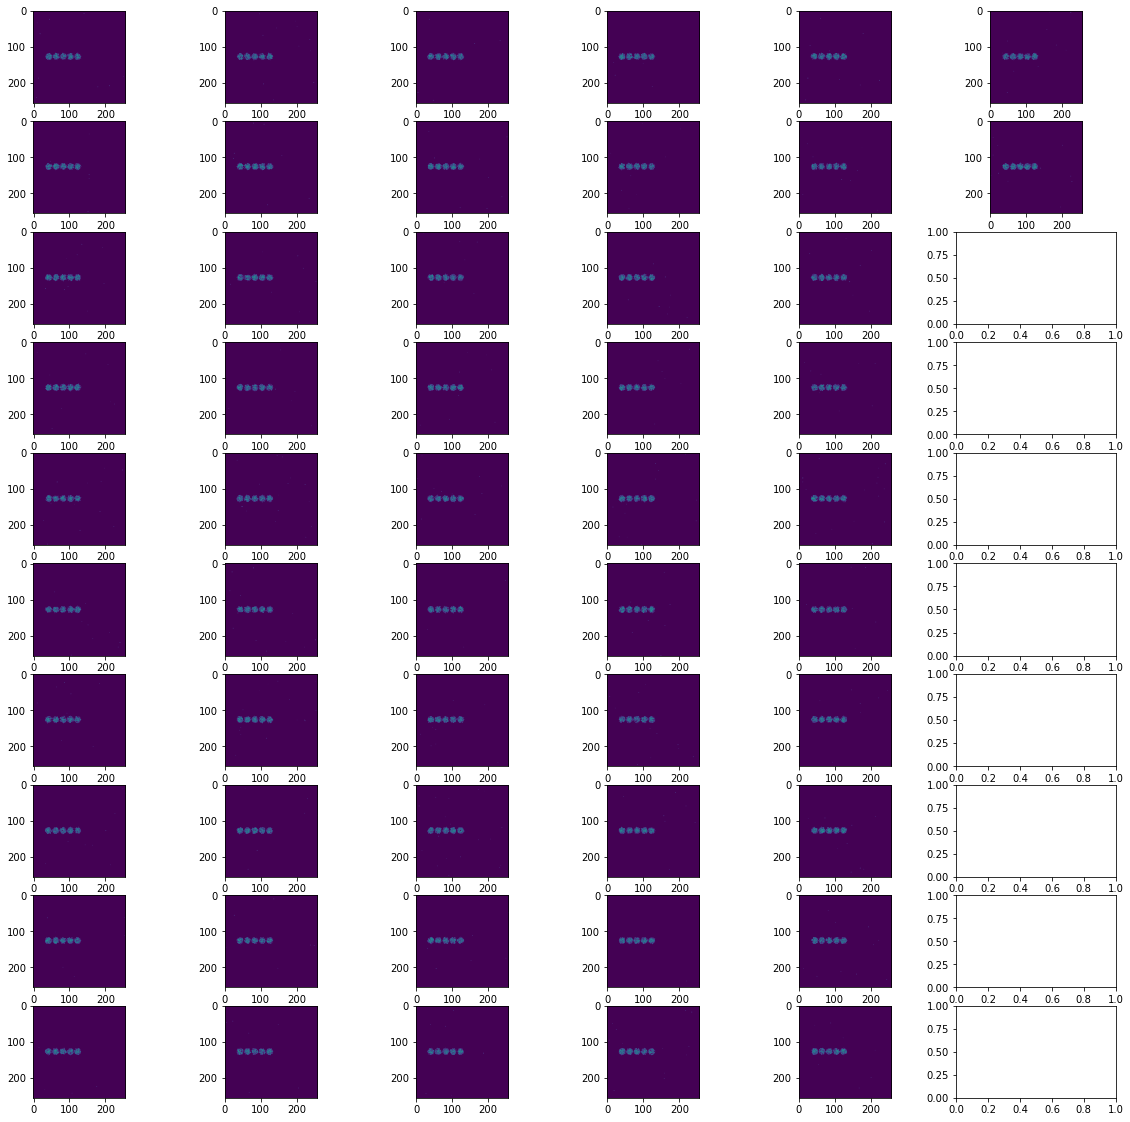

In [62]:
fig, ax = plt.subplots(10,6, figsize=(20,20))
i=0
ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase-Dose.mhd' , sitk.sitkFloat32))
imagen_GATE_dosisBase = ct_scansBase[0]
#for i in range(Num_proyec-1):
for j in range(6):
    for k in range(10):
        ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile%d-Dose.mhd' %i , sitk.sitkFloat32))
        imagen_GATE_dosis = ct_scans[0]
        imagen_GATE_dosis = ct_scans[0]+0.00000000001
        imagen_GATE_dosis= imagen_GATE_dosisBase/imagen_GATE_dosis
        imagen_GATE_dosis= imagen_GATE_dosis/np.max(imagen_GATE_dosis)
        df = pd.DataFrame(data=imagen_GATE_dosis.astype(float))
        df.to_csv('outfile%d.txt' %i, sep=',', header=False,float_format='%.2f',  index=False)
        ax[k,j].imshow(imagen_GATE_dosis,cmap='viridis')
        i=i+1
        #print(i)
    #plt.colorbar()

plt.savefig('proyecciones5.jpg')
plt.show()

In [63]:
data = pd.read_csv('outfile0.txt',sep=',',header=None)
data = pd.DataFrame(data)

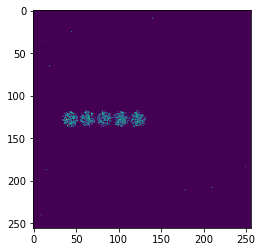

In [64]:
 plt.imshow(data,cmap='viridis')

In [65]:
from skimage.transform import radon, iradon

tamano_rodaja = 1 # en pixeles
tamano_detector = 256 # en pixeles
max_ind = int((tamano_detector/tamano_rodaja) - 1) # Numero de rodajas (enteras)
numero_imagenes = Num_proyec

IMGs = []

for i in range(numero_imagenes):
    #IMG = np.genfromtxt('outfile%d.txt' %i)
    IMG = pd.read_csv('outfile%d.txt' %i,sep=',',header=None)
    IMG = pd.DataFrame(IMG)
    #print(IMG)
    IMGs.append(IMG)

IMGs = np.array(IMGs)


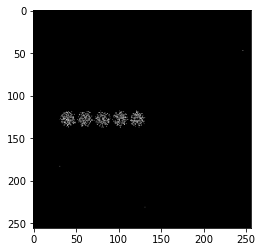

In [66]:
plt.imshow(IMGs[25], cmap="gray")
#plt.colorbar()
plt.show()

In [67]:
sinograms = []

for ind in range(max_ind):
    projections = []
    for im in IMGs:
        rodaja = np.sum(im[tamano_rodaja*ind:tamano_rodaja*(ind+1), :], axis=0)
        projections.append(rodaja)
    
    projections = np.array(projections)
    sinograms.append(np.transpose(projections))

sinograms = np.array(sinograms)

del projections

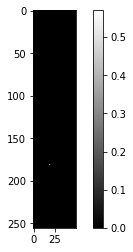

In [68]:
plt.imshow(sinograms[0],cmap="gray")
plt.colorbar()

In [74]:
print(len(sinograms))
print(len(Angulos))
Angulos= np.delete(Angulos,-1)
Angulos= np.delete(Angulos,-1)

255
51


0.0


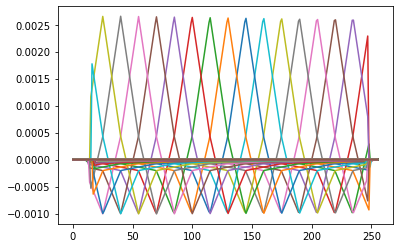

In [75]:
Angulos= np.delete(Angulos,-1)
theta= Angulos
reconstruction_fbp= iradon(sinograms[0],theta=theta,filter_name='hann')
print(max(reconstruction_fbp[0]))
plt.plot(reconstruction_fbp)
plt.show()

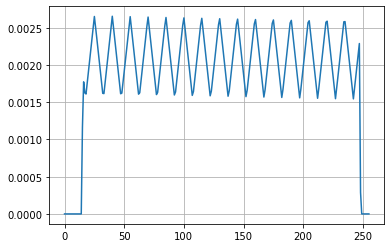

In [76]:
k=[]
for i in reconstruction_fbp:
    k.append(max(i))
plt.plot(k)
plt.grid()

In [79]:
#theta = np.linspace(0.0, 208.8, numero_imagenes, endpoint=False)
theta= Angulos
rodajas = []

for ind, sinogram in enumerate(sinograms):
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='hann')
    plt.imshow(reconstruction_fbp, cmap="gray", vmin=0.02, vmax=0.04)
    plt.colorbar()
    plt.savefig("rodaja_{}.png".format(ind))
    plt.clf()
    
    indx_sup = np.where(reconstruction_fbp >= 0.003)
    indx_inf = np.where(reconstruction_fbp <= 0.002)
    reconstruction_fbp[indx_sup[0], indx_sup[1]] = 0.003
    reconstruction_fbp[indx_inf[0], indx_inf[1]] = 0.0015
    rodajas.append(reconstruction_fbp)

<Figure size 432x288 with 0 Axes>

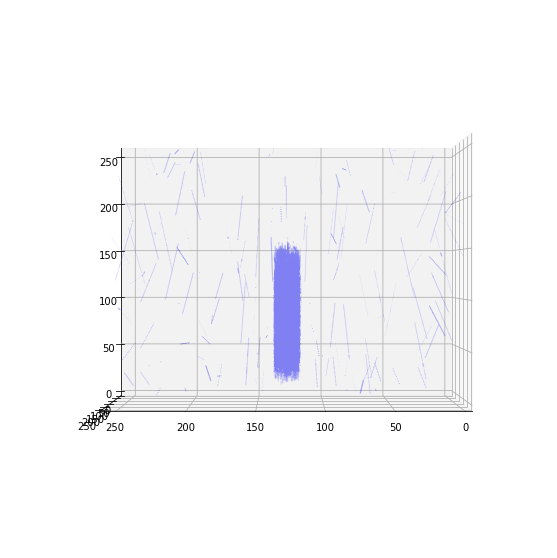

In [80]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
%matplotlib inline

def plot_3d(image, threshold=0.0023): 
    verts, faces, normals, values = measure.marching_cubes(image, level=threshold , method='lewiner')
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.2) #alpha =0.1
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, 256)
    ax.set_ylim(0, 256)
    ax.set_zlim(0, 255)
    ax.view_init(0,90) # (polar, azimutal) 
    plt.show()

rodajas = np.array(rodajas)
plot_3d(rodajas)